## ❗ Atividade 1 ❗

Teste o método de Newton que implementamos para achar a raiz do seguinte polinômio partindo sempre de $x_0=100$:

$$ f(x) = (x - 1)^{3 n}, $$

onde $n$ é o primeiro dígito seu número USP. 

Quantas iterações foram necessárias para garantir um erro menor que $10^{-8}$? 

Será que o número de iterações varia conforme o $n$?

In [1]:
# Biblioteca de "algebra linear computacional"
import numpy as np

#Acesso a ferramentas de sistema
import sys

#Pacotes para gráficos
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

A primeira coisa para fazer é testar o método de Newton implementado na aula, para isso temos que o programa é o seguinte:

In [2]:
# Método de Newton, com parámetros:
# f  : função
#df  : derivada da função
#x0  : chute inicial
#n   : número de iterações máximo
#tol : limitar para critério de parada
#stop: tipo de critério de parada ("f" default, "x")

def newton(f, df, x0, n=1000, tol=10e-30, stop='f'):
    x = np.zeros(n+1)
    x[0] = x0
    
    #iteradas
    for i in range(n):
            
        # Se a derivada for muito perto de zero,... sem chances de continuar
        if np.abs(df(x[i])) < 10e-20:
            print("derivada muito perto de zero...parando em", i, "iterações!")
            return x[:i+1] # Isso faz com o vetor devolvido vá até "i", incluso.
    
        #Aqui esta o método
        x[i+1] = x[i] - f(x[i])/df(x[i])
    
        # Critérios de parada
        if stop == "x" and np.abs(x[i+1]-x[i]) < tol: #Diferença em x pequena
            print('Diferença em x pequena, parando em ', i, 'iterações!')
            return x[:i+2] #Devolvo até o elemento "i+1", incluso, pois este já foi computado
        elif stop == "f" and np.abs(f(x[i+1])) < tol: # f pequeno
            print('Diferença em f pequena, parando em ', i, 'iterações!')
            return x[:i+2] #Devolvo até o elemento "i+1", incluso, pois este já foi computado
    print("Numero máximo de iterações atingido!", n)
    return x

Agora, para $n=1$ temos que a função é:
$$ f(x) = (x-1)^3, $$
assim, temos que o método de Newton da o seguinte:

In [3]:
f = lambda x: (x-1)**3
df = lambda x: 3*(x-1)**2
root = newton(f, df, x0=100, n = 100)
print(root)

Diferença em f pequena, parando em  66 iterações!
[100.          67.          45.          30.33333333  20.55555556
  14.03703704   9.69135802   6.79423868   4.86282579   3.57521719
   2.71681146   2.14454097   1.76302732   1.50868488   1.33912325
   1.22608217   1.15072145   1.10048096   1.06698731   1.04465821
   1.02977214   1.01984809   1.01323206   1.00882137   1.00588092
   1.00392061   1.00261374   1.00174249   1.00116166   1.00077444
   1.00051629   1.0003442    1.00022946   1.00015298   1.00010198
   1.00006799   1.00004533   1.00003022   1.00002015   1.00001343
   1.00000895   1.00000597   1.00000398   1.00000265   1.00000177
   1.00000118   1.00000079   1.00000052   1.00000035   1.00000023
   1.00000016   1.0000001    1.00000007   1.00000005   1.00000003
   1.00000002   1.00000001   1.00000001   1.00000001   1.
   1.           1.           1.           1.           1.
   1.           1.           1.        ]


Temos que para está função, o método de Newton converge em 68 iterações, vejamos o comportamiento do método gráficamente.

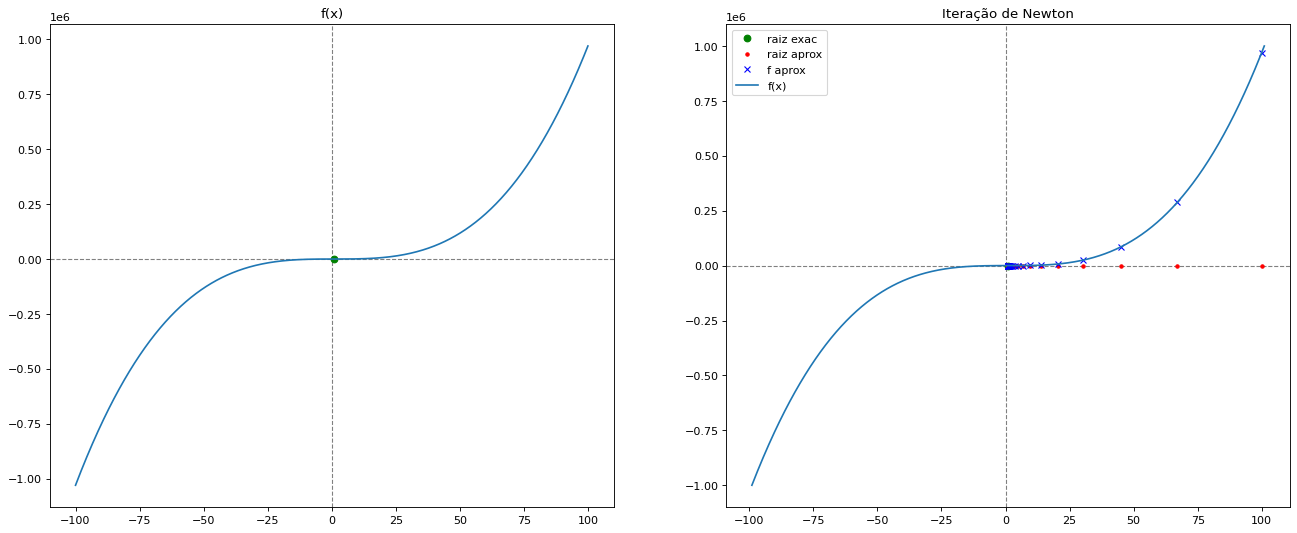

In [4]:
#Agora vejamos o comportamiento graficamente
#Figura
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,8), dpi=80)
plt.subplots_adjust(hspace=0.4)

for i in [ax1, ax2]:
    i.axhline(y=0.0, color='grey', lw='1', linestyle = '--')
    i.axvline(x=0.0, color='grey', lw='1', linestyle = '--')
    i.plot(1,f(1),'go', label='raiz exac')

#Função
x1 = np.linspace(-100,100,1000)
ax1.plot(x1,f(x1))
ax1.set_title('f(x)')

#Iteracão de Newton
ax2.plot(root, np.zeros_like(root), 'r.', label='raiz aprox')
ax2.plot(root, f(root), 'bx', label='f aprox')
x = np.linspace(np.min(root)-100, np.max(root)+1,1000)
ax2.plot(x,f(x), label='f(x)')
ax2.set_title('Iteração de Newton')
ax2.legend(loc='upper left')
plt.show()

Agora vejamos quantas iterações foram necessárias para garantir um erro menor que $10^{-8}$. Para isso podemos fazer o seguinte programa.

In [5]:
#Função para achar iteração em que o erro é menor que tol1, 
def verf(r,tol1 = 10e-8, root_exact = 1):
    for i in range(len(r)):
        if abs(root_exact-r[i])< tol1:
            break
    print('Número de iterações necessárias foram: ', i)


verf(root)
#abs(root_exact-root[52])<tol1

Número de iterações necessárias foram:  52


Assim, podemos concluir que depois de 52 iteraçõs temos um erro menor que $10^{-8}$ neste caso. Agora podemos perguntar, o número de iteraçõs varia conforme o $n$?

Para dar resposta a essa pergunta, podemos estudar o caso quando $n=2$ para assim estudar como é o comportamento das iterações e da convergência. A função a estudar é:

$$g(x)=(x-1)^6. $$


In [6]:
#Pegamos n=2
g = lambda x: (x-1)**6
dg = lambda x: 6*(x-1)**5
#Criterio de parada x
root1 = newton(g,dg, x0=100, n=100,tol=10e-30, stop='x')
print(root1)


derivada muito perto de zero...parando em 76 iterações!
[100.          83.5         69.75        58.29166667  48.74305556
  40.78587963  34.15489969  28.62908308  24.0242359   20.18686325
  16.98905271  14.32421059  12.10350882  10.25292402   8.71077002
   7.42564168   6.3547014    5.46225117   4.71854264   4.09878553
   3.58232128   3.1519344    2.79327866   2.49439889   2.24533241
   2.03777701   1.86481417   1.72067848   1.6005654    1.50047116
   1.4170593    1.34754942   1.28962452   1.24135376   1.20112814
   1.16760678   1.13967232   1.1163936    1.09699466   1.08082889
   1.06735741   1.05613117   1.04677598   1.03897998   1.03248332
   1.02706943   1.02255786   1.01879822   1.01566518   1.01305432
   1.0108786    1.0090655    1.00755458   1.00629548   1.00524624
   1.00437186   1.00364322   1.00303602   1.00253001   1.00210834
   1.00175695   1.00146413   1.00122011   1.00101676   1.0008473
   1.00070608   1.0005884    1.00049033   1.00040861   1.00034051
   1.00028376   1.000

In [7]:
verf(root1)
root_exact = 1
print(abs(root_exact-root1[76])<10e-8)
print(root_exact-root1[76])

Número de iterações necessárias foram:  76
False
-9.502994873455961e-05


In [8]:
#criterio de parada f
root2 = newton(g,dg, x0=100, n=100,tol=10e-30, stop='f')
print(root2)

derivada muito perto de zero...parando em 76 iterações!
[100.          83.5         69.75        58.29166667  48.74305556
  40.78587963  34.15489969  28.62908308  24.0242359   20.18686325
  16.98905271  14.32421059  12.10350882  10.25292402   8.71077002
   7.42564168   6.3547014    5.46225117   4.71854264   4.09878553
   3.58232128   3.1519344    2.79327866   2.49439889   2.24533241
   2.03777701   1.86481417   1.72067848   1.6005654    1.50047116
   1.4170593    1.34754942   1.28962452   1.24135376   1.20112814
   1.16760678   1.13967232   1.1163936    1.09699466   1.08082889
   1.06735741   1.05613117   1.04677598   1.03897998   1.03248332
   1.02706943   1.02255786   1.01879822   1.01566518   1.01305432
   1.0108786    1.0090655    1.00755458   1.00629548   1.00524624
   1.00437186   1.00364322   1.00303602   1.00253001   1.00210834
   1.00175695   1.00146413   1.00122011   1.00101676   1.0008473
   1.00070608   1.0005884    1.00049033   1.00040861   1.00034051
   1.00028376   1.000

Neste caso podemos ver que não consigue-se um erro menor que $10^{-8}$ porque primerio, o valor da última iteraçõe nāo é o suficientemente perto da raíz e por outro lado, podemos ver que o método pára porque o valor da derivada é muito perto de zero, neste caso o método de Newton deixa de ser muito bom para achar a raíz. O comportamiento da derivada pode-se ver na gráfica da função.

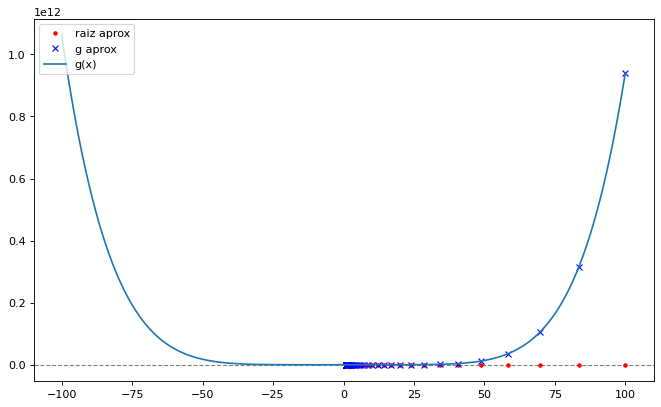

In [9]:
fig = plt.figure(figsize=(10, 6), dpi=80)
plt.axhline(y=0.0, color='grey', lw='1', linestyle='--')
plt.plot(root1, np.zeros_like(root1), 'r.', label="raiz aprox")
plt.plot(root1, g(root1), 'bx', label="g aprox")
x = np.linspace(-100,100,1000)
plt.plot(x,g(x), label = 'g(x)')
plt.legend(loc='upper left')
plt.show()

Na gráfica podemos ver como essos coeficientes angulares vão para zero, assim, temos o problema da divisão por zero no método de Newton, portanto não é possível ter um erro menor $10^{-8}$. Note que neste caso, a convergência é linear pois se lembramos o exercício 2 da lista, temos las hipoteses, e portanto temos que
$$
\lim_{n\to\infty}\frac{x_{n+1}-1}{x_n-1} = 1-\frac{1}{k} = 1-\frac{1}{6}=\frac{5}{6}.
$$

Agora se fazemos a modificação no método como diz o exercício 2 da lista 1, temos que a convergência é quadrática e que é obtida na primeria iteração.

In [10]:
# Método de Newton ex2 lista, com parámetros:
# f  : função
#df  : derivada da função
#x0  : chute inicial
#n   : número de iterações máximo
#tol : limitar para critério de parada
#stop: tipo de critério de parada ("f" default, "x")
#k   : expoente da função

def newton1(f, df, x0,k, n=1000, tol=10e-30, stop='f'):
    x = np.zeros(n+1)
    x[0] = x0
    
    #iteradas
    for i in range(n):
            
        # Se a derivada for muito perto de zero,... sem chances de continuar
        if np.abs(df(x[i])) < 10e-20:
            print("derivada muito perto de zero...parando em", i, "iterações!")
            return x[:i+1] # Isso faz com o vetor devolvido vá até "i", incluso.
    
        #Aqui esta o método
        x[i+1] = x[i] - k*(f(x[i])/df(x[i]))
    
        # Critérios de parada
        if stop == "x" and np.abs(x[i+1]-x[i]) < tol: #Diferença em x pequena
            print('Diferença em x pequena, parando em ', i, 'iterações!')
            return x[:i+2] #Devolvo até o elemento "i+1", incluso, pois este já foi computado
        elif stop == "f" and np.abs(f(x[i+1])) < tol: # f pequeno
            print('Diferença em f pequena, parando em ', i, 'iterações!')
            return x[:i+2] #Devolvo até o elemento "i+1", incluso, pois este já foi computado
    print("Numero máximo de iterações atingido!", n)
    return x

In [11]:
root3 = newton1(g, dg, x0=100, k=6, n=100)
print(root3)

Diferença em f pequena, parando em  0 iterações!
[100.   1.]


Com isso pode-se ver que se fazemos essa modificação no método de Newton, a convergência é realizada em uma iteração, pois note o seguinte; a modificação é,
$$x_{n+1} = x_n + k\frac{f(x_n)}{f'(x_n)},  $$
onde $k$ é o expoente da função, então se $f(x) = (x-1)^6$ e $x_0 = 100$ temos que,
$$\begin{align}x_1 &= 100 - 6\frac{(100-1)^6}{6(100-1)^5}, \\
                   &= 100 - (100-1),\\
                   &= 1.\end{align}
$$

A conclução que achamos é que se cambia $n$ então o número de iterações para que o erro seja menor é maior. 

### Convergência

Uma sequência $\{x_{n}\}_n$ convergente para $\bar{x}$ é convergente de ordem $\alpha \ge 1$ se, 
$$\lim_{n \to \infty} \frac{|x_{n+1}-\bar{x}|}{|x_n-\bar{x}|^{\alpha}} = \lambda \in \mathbb{R}.$$

É possível mostrar que se a sequência converge com ordem $\alpha$ para o valor $\bar{x}$, então 
$$\lim_{n \to \infty} \frac{|x_{n+1}-\bar{x}|}{|x_n-\bar{x}|^{\alpha}} = \lim_{n \to \infty} \frac{|x_{n+1}-x_n|}{|x_n-x_{n-1}|^{\alpha}}.$$

É possível estimar a ordem de convergência de um método com base nas suas iterações. Vejamos. Para $n$ suficientemente grande
$$
\frac{|x_{n+1}-x_n|}{|x_n-x_{n-1}|^{\alpha}} \approx \lambda .
$$
Mas observe que também vale para $n+2$,
$$
\frac{|x_{n+2}-x_n|}{|x_{n+1}-x_{n}|^{\alpha}} \approx \lambda,
$$
logo podemos escrever que 
$$
\frac{|x_{n+2}-x_{n+1}|}{|x_{n+1}-x_{n}|^{\alpha}} \approx \frac{|x_{n+1}-x_n|}{|x_n-x_{n-1}|^{\alpha}}
$$

de onde podemos tirar que
$$
\left(\frac{|x_n-x_{n-1}|}{|x_{n+1}-x_{n}|}\right)^{\alpha} \approx \frac{|x_{n+1}-x_n|}{|x_{n+2}-x_{n+1}|}
$$
e portanto
$$
\alpha \approx \frac  {\ln \left(\frac{|x_{n+1}-x_n|}{|x_{n+2}-x_{n+1}|}\right)}{ \ln \left(\frac{|x_n-x_{n-1}|}{|x_{n+1}-x_{n}|}\right)}
$$

## ❗ Atividade 2 ❗ 

Estime a ordem de convergência ($\alpha$) do método de Newton implementado com base na estimativa acima para 3 exemplos:
 
 1. Caso onde é esperado 2a ordem

 2. Caso onde é esperado menos de 2a ordem

 3. Caso onde é esperado mais de 2a. ordem.
 
Mostre o gráfico da função e das aproximações ilustrando o problema.

1. Para o primer caso considere $h(x) = e^x-2$, essa função apresenta convergência de ordem 2 quando se quere achar a raíz pelo método de Newton, podemos verificar isso através da teoria, pois, neste caso 
$$
\phi(x) = x - \frac{e^x-2}{e^x} = x - 1 + 2e^{-x},
$$
então, 
$$\phi'(x) = 1 - 2e^{-x}, $$ e $$\phi''(x) = 2e^{-x}.$$
Se calculamos, 
$$\phi'(\bar{x}) = \phi'(\ln 2) = 1-2e^{-\ln 2}= 1-2/2 = 0,$$ e 
$$
\phi''(\bar{x}) = \phi''(\ln 2) = 2e^{-\ln 2} = 1,
$$
podemos concluir que a convergência é quadrática.
Agora, vejamos que isto é verdade com base na estimativa de $\alpha$
$$
\alpha \approx \frac  {\ln \left(\frac{|x_{n+1}-x_n|}{|x_{n+2}-x_{n+1}|}\right)}{ \ln \left(\frac{|x_n-x_{n-1}|}{|x_{n+1}-x_{n}|}\right)}
$$
utilizando nosso programa do método de Newton.


In [12]:
#Função que calcula na estimativa de acima.
def ordconvergencia(x):
    n = len(x)
    vecta = np.zeros(n-3)
    for i in range(n):
        if i < n-3:
            vecta[i] = np.log(abs(x[i+2]-x[i+1])/abs(x[i+3]-x[i+2]))/np.log(abs(x[i+1]-x[i])/abs(x[i+2]-x[i+1]))
    return vecta   

In [13]:
#fazemos newton para nossa função
h = lambda x: np.exp(x)-2
dh = lambda x: np.exp(x)
root4 = newton(h, dh, x0 = 7, n=100)
print(root4)
exact_root4 = np.log(2)
print('Erro: ', abs(root4[-1] - exact_root4))

Diferença em f pequena, parando em  10 iterações!
[7.         6.00182376 5.00677224 4.02015718 3.05605746 2.1502033
 1.38312425 0.88471182 0.71037807 0.69329478 0.69314719 0.69314718]
Erro:  1.1102230246251565e-16


In [14]:
alpha1 = ordconvergencia(root4)
print(alpha1)

[2.71568868 2.71126138 2.6994059  2.66845468 2.59285511 2.43633831
 2.21129682 2.04548818 2.00237794]


Como a estimativa é para $n$ suficientemente grande então, a melhor estimativa em nosso caso é o último valor do vetor da acima, onde podemos concluir que neste caso $\alpha \approx 2$. 

Agora, fazemos a ilustração desse problema.

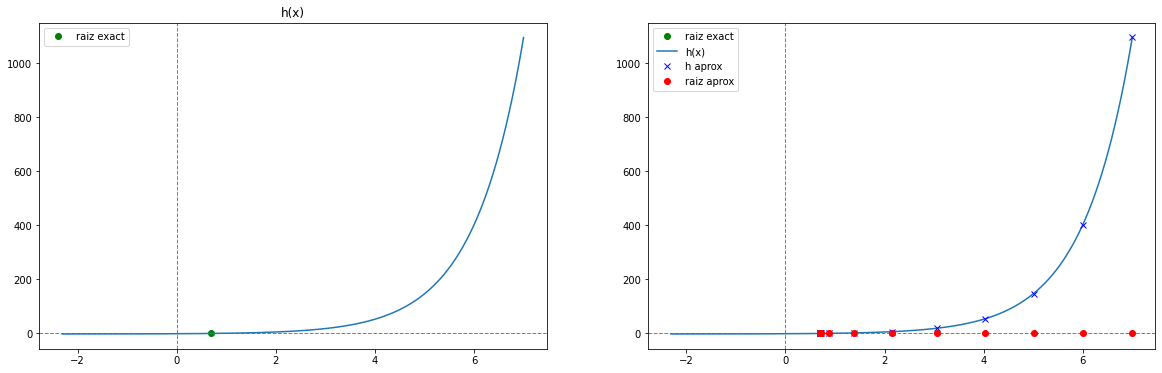

In [15]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(20,6) )
plt.subplots_adjust(hspace = 0.4)

#eixos auxiliares
for i in [ax1, ax2]:
    i.axhline(y=0.0, color='grey', lw='1', linestyle='--')
    i.axvline(x=0.0, color='grey', lw='1', linestyle='--')
    i.plot(exact_root4, h(exact_root4), 'go', label = 'raiz exact')

#função
x = np.linspace(np.min(root4)-3,7,1000)
ax1.plot(x,h(x))
ax1.set_title('h(x)')
ax1.legend()

#função e iteração de Newton
ax2.plot(x,h(x), label='h(x)')
ax2.plot(root4, h(root4), 'bx', label = 'h aprox')
ax2.plot(root4, np.zeros_like(root4), 'ro', label= 'raiz aprox')
ax2.legend()

plt.show()
    

3. Neste caso, consideraremos a função $k(x) = \sin x$, pois sabemos que essa função apresenta convergência cúbica. Isso pode-se ver já que:
$$k'(\bar{x}) = \cos \bar{x} = \cos 0 = 1 \neq 0,$$
e
$$k''(\bar{x}) = -\sin \bar{x} = -\sin 0 = 0.$$
Assim, temos as condições para que a função $k$ apresente convergência cúbica.
Vejamos isto, fazendo a estimativa de $\alpha$.

In [16]:
#Newton para este caso
k = lambda x: np.sin(x)
dk = lambda x: np.cos(x)
exact_root5 = 0
root5 = newton(k, dk, x0=1.1, n=100)
print(root5)
print('Erro: ' ,abs(root5[-1]-exact_root5))

Diferença em f pequena, parando em  5 iterações!
[ 1.10000000e+00 -8.64759657e-01  3.08039891e-01 -1.01277323e-02
  3.46284617e-07 -1.38172250e-20  0.00000000e+00]
Erro:  0.0


In [17]:
alpha2 = ordconvergencia(root5)
print(alpha2)

[2.5283539  2.64245322 2.98310572 3.00016363]


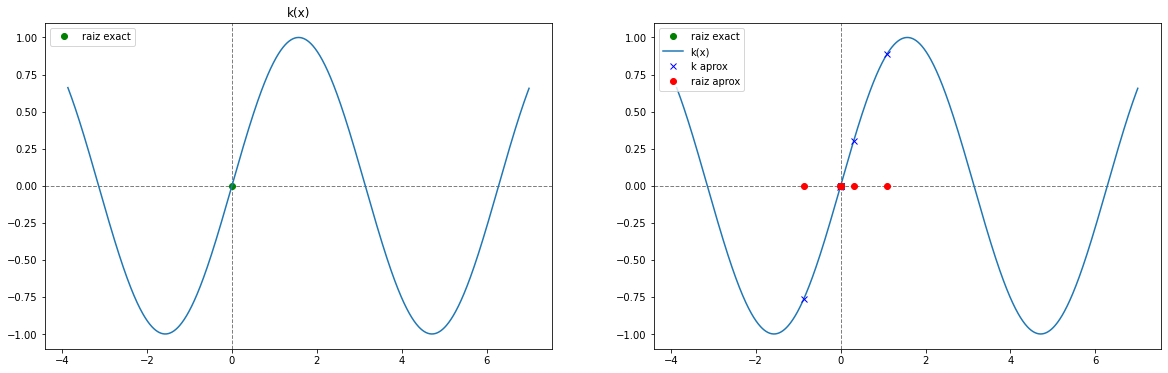

In [18]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(20,6) )
plt.subplots_adjust(hspace = 0.4)

#eixos auxiliares
for i in [ax1, ax2]:
    i.axhline(y=0.0, color='grey', lw='1', linestyle='--')
    i.axvline(x=0.0, color='grey', lw='1', linestyle='--')
    i.plot(exact_root5, k(exact_root5), 'go', label = 'raiz exact')

#função
x = np.linspace(np.min(root5)-3,7,1000)
ax1.plot(x,k(x))
ax1.set_title('k(x)')
ax1.legend(loc = 'upper left')

#função e iteração de Newton
ax2.plot(x,k(x), label='k(x)')
ax2.plot(root5, k(root5), 'bx', label = 'k aprox')
ax2.plot(root5, np.zeros_like(root5), 'ro', label= 'raiz aprox')
ax2.legend(loc='upper left')

plt.show()

Podemos fazer a seguinte pergunta, que acontece se a convergência for a $\pi$?, temos então que se trocamos $x_0$ isto pode acontecer. Vejamos então o seguinte:

In [19]:
exact_root6 = np.pi
root6 = newton(k, dk, x0=2, n=100, stop='x')
print(root6)
print('Erro: ' ,abs(root6[-1]-exact_root6))

Diferença em x pequena, parando em  6 iterações!
[2.         4.18503986 2.46789367 3.26618628 3.14094391 3.14159265
 3.14159265 3.14159265]
Erro:  0.0


In [20]:
alpha3 = ordconvergencia(root6)
print(alpha3)

[3.17858106 2.41822497 2.84143319 2.99822273        inf]


/var/folders/my/sj6mx8g50f39kt11jjzbgzdc0000gn/T/ipykernel_4550/1096188803.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  vecta[i] = np.log(abs(x[i+2]-x[i+1])/abs(x[i+3]-x[i+2]))/np.log(abs(x[i+1]-x[i])/abs(x[i+2]-x[i+1]))


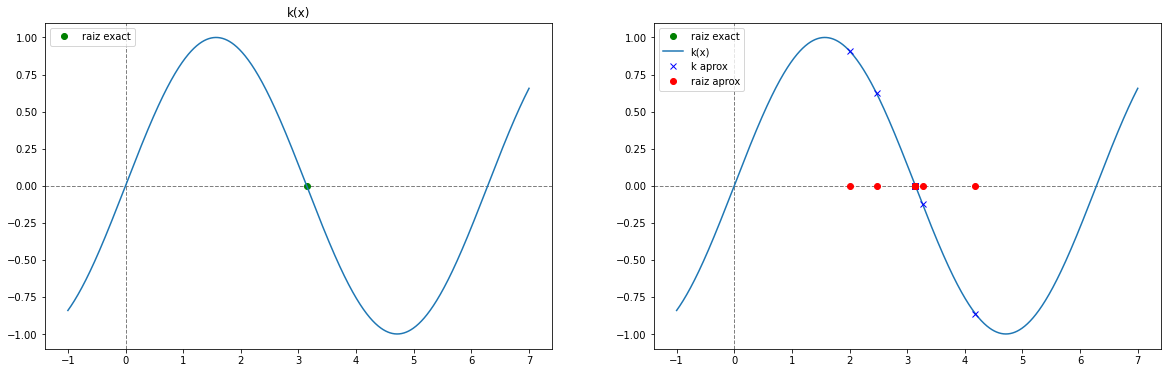

In [21]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(20,6) )
plt.subplots_adjust(hspace = 0.4)

#eixos auxiliares
for i in [ax1, ax2]:
    i.axhline(y=0.0, color='grey', lw='1', linestyle='--')
    i.axvline(x=0.0, color='grey', lw='1', linestyle='--')
    i.plot(exact_root6, k(exact_root6), 'go', label = 'raiz exact')

#função
x = np.linspace(np.min(root6)-3,7,1000)
ax1.plot(x,k(x))
ax1.set_title('k(x)')
ax1.legend(loc = 'upper left')

#função e iteração de Newton
ax2.plot(x,k(x), label='k(x)')
ax2.plot(root6, k(root6), 'bx', label = 'k aprox')
ax2.plot(root6, np.zeros_like(root6), 'ro', label= 'raiz aprox')
ax2.legend(loc='upper left')

plt.show()

Note que neste caso, a ordem de convergência também é $\alpha = 3$, mas um ponto importante é que precisamos de mudar o criterio de parada para que o método possa convergir, porque neste caso se deixamos o criterio "default" temos que o algoritmo não pára.

O erro que ve-se acima é porque no calculo de um $\alpha$ divide-se por zero, porque os termos obtidos ao final estão muito perto.

2. Para esse caso podemos escolher a função $b(x) = (x-3)^3$ isto, porque como estudamos no exercício 2 da lista temos que essa função cumple as hipoteses porque é contínua e,
$$
b(3)=0,\text{ } b'(3)=3(3-3)^2=0,\text{ } b''(3)=6(3-3)=0,\text{ } b'''(3)=6\neq 0
$$
e portanto temos que a convergência é linear.
Vamos verrificar então que nosso $\alpha=1$ com a estimativa dada ao início do exercício.

In [22]:
b = lambda x: (x-3)**3
db = lambda x: 3*(x-3)**2
root7 = newton(b, db, x0=10, n=100)
exact_root7 = 3
print(root7)
print('Erro: ', abs(root7[-1]-exact_root7))

Diferença em f pequena, parando em  59 iterações!
[10.          7.66666667  6.11111111  5.07407407  4.38271605  3.9218107
  3.61454047  3.40969364  3.2731291   3.18208606  3.12139071  3.08092714
  3.05395143  3.03596762  3.02397841  3.01598561  3.01065707  3.00710471
  3.00473648  3.00315765  3.0021051   3.0014034   3.0009356   3.00062373
  3.00041582  3.00027721  3.00018481  3.00012321  3.00008214  3.00005476
  3.00003651  3.00002434  3.00001622  3.00001082  3.00000721  3.00000481
  3.0000032   3.00000214  3.00000142  3.00000095  3.00000063  3.00000042
  3.00000028  3.00000019  3.00000013  3.00000008  3.00000006  3.00000004
  3.00000002  3.00000002  3.00000001  3.00000001  3.          3.
  3.          3.          3.          3.          3.          3.
  3.        ]
Erro:  1.90380600173512e-10


In [23]:
alpha4 = ordconvergencia(root7)
print(alpha4)

[1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         0.99999999
 1.00000003 0.99999997 1.00000003 0.99999998 1.         0.99999993
 1.00000017 0.99999975 0.99999993 1.00000022 1.         1.
 1.00000114 0.99999886 1.         1.00000384]


Com isso podemos ver que a ordem da convergência é $\alpha = 1$, agora, ilustremos o problema.

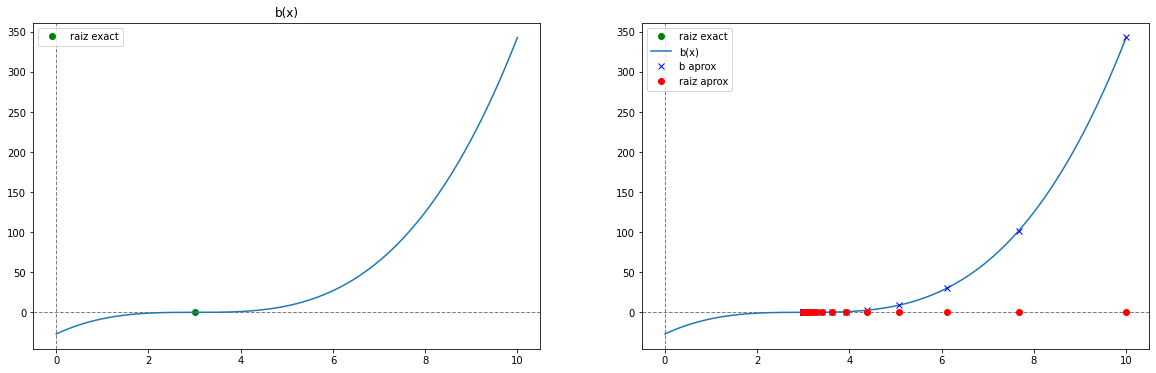

In [24]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(20,6) )
plt.subplots_adjust(hspace = 0.4)

#eixos auxiliares
for i in [ax1, ax2]:
    i.axhline(y=0.0, color='grey', lw='1', linestyle='--')
    i.axvline(x=0.0, color='grey', lw='1', linestyle='--')
    i.plot(exact_root7, b(exact_root7), 'go', label = 'raiz exact')

#função
x = np.linspace(np.min(root7)-3,10,1000)
ax1.plot(x,b(x))
ax1.set_title('b(x)')
ax1.legend(loc = 'upper left')

#função e iteração de Newton
ax2.plot(x,b(x), label='b(x)')
ax2.plot(root7, b(root7), 'bx', label = 'b aprox')
ax2.plot(root7, np.zeros_like(root7), 'ro', label= 'raiz aprox')
ax2.legend(loc='upper left')

plt.show()

## ❗ Atividade ❗  

Implemente o **método das secantes** para números complexos e tente construir fractais como fizemos.

Método das secantes:
Dados $x_0$ e $x_1$,
$$
x_{i+1} = x_{i} - f(x_i) \frac{x_{i}-x_{i-1}}{f(x_{i})-f(x_{i-1})}
$$

In [25]:
#Método das secantes.
#f  : função
#x0 : chute inicial
#x1 : outro chute inicial (o método das secantes precisa de dois)
#n  : número de iterações máximo
#tol: tolerancia, limitar para o critério de parada
#stop: criterio de parada ('f' default, 'x')

def secante(f, x0, x1, n=1000, tol=10e-30, stop='f'):
    #x = np.zeros(n+2)  #Caso real
    x = np.zeros(n+2, dtype=np.complex64) #Caso complexo
    x[0] = x0
    x[1] = x1
    
    for i in range(1,n):
        #Se a diferença de f(xi)-f(xi-1) é muito perto de zero impossível continuar.
        if abs(f(x[i])-f(x[i-1]))< 10e-20:
            print('Não é possível dividir por zero, parando em ', i, 'iterações.')
            return x[:i+1]
        
        #O método
        x[i+1] = x[i]-f(x[i])*(x[i]-x[i-1])/(f(x[i])-f(x[i-1]))
        
        #Critérios de parada
        if stop == 'f' and abs(f(x[i+1])-f(x[i])) < tol: #diferença em f é pequena
            return x[:i+2]
        if stop == 'x' and abs(x[i+1]-x[i]) < tol:
            return x[:i+2]
    return x[:i+1]
            
        
        
    
    
    

In [26]:
#test de operação caso real
sroot = secante(f, x0=-2, x1=3, n=100)
print(sroot)
exact_sroot = 1
print('Erro: ', abs(sroot[-1]-exact_sroot))

Não é possível dividir por zero, parando em  55 iterações.
[-2.       +0.j  3.       +0.j  1.8571428+0.j  1.7594936+0.j
  1.5362605+0.j  1.4149927+0.j  1.3102505+0.j  1.235071 +0.j
  1.1771964+0.j  1.1338351+0.j  1.1010077+0.j  1.0762547+0.j
  1.0575612+0.j  1.0434521+0.j  1.0328009+0.j  1.0247607+0.j
  1.0186913+0.j  1.0141096+0.j  1.010651 +0.j  1.0080402+0.j
  1.0060693+0.j  1.0045816+0.j  1.0034585+0.j  1.0026108+0.j
  1.0019708+0.j  1.0014877+0.j  1.0011231+0.j  1.0008478+0.j
  1.00064  +0.j  1.0004832+0.j  1.0003648+0.j  1.0002754+0.j
  1.0002079+0.j  1.0001569+0.j  1.0001185+0.j  1.0000894+0.j
  1.0000675+0.j  1.0000509+0.j  1.0000384+0.j  1.000029 +0.j
  1.0000218+0.j  1.0000165+0.j  1.0000124+0.j  1.0000094+0.j
  1.000007 +0.j  1.0000054+0.j  1.000004 +0.j  1.0000031+0.j
  1.0000024+0.j  1.0000018+0.j  1.0000013+0.j  1.000001 +0.j
  1.0000007+0.j  1.0000006+0.j  1.0000005+0.j  1.0000004+0.j]
Erro:  3.5762786865234375e-07


In [27]:
#Agora vejamos o caso complexo
t = lambda z: z**3-1
#chamamos o nosso método das secantes
z0 = 1+1j
z1 = -1-1j
sroot1 = secante(t, x0=z0, x1=z1,n=100)
print(sroot1)

[ 1.        +1.j         -1.        -1.j          0.        -0.5j
 -0.1559633 -0.853211j   -0.7033648 -0.58479804j -0.5552794 -1.0148633j
 -0.5445708 -0.83541167j -0.50710505-0.86286086j -0.49981442-0.8656472j
 -0.49999693-0.8660265j  -0.5       -0.8660254j  -0.5       -0.8660254j ]


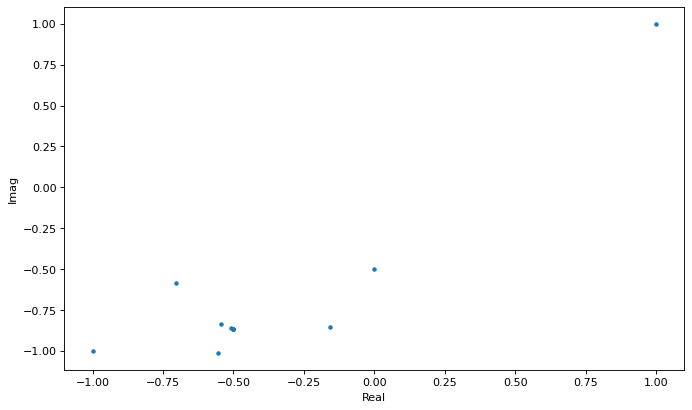

In [28]:
#plot das raizes
fig = plt.figure(figsize=(10,6), dpi=80)
plt.plot(sroot1.real,sroot1.imag, '.')
plt.ylabel('Imag')
plt.xlabel('Real')
plt.show()

Agora façamos os fractais para esse caso.

In [29]:
#Dominio [-a,a]x[-a*i,a*i]
a = 1.2

#Discretização do dominio em 2000 pontos
d = 1001j

#Malha de reais em R2
x, y = np.ogrid[-a:a:d, -a:a:d]

#Malha de complexos

z0 = x + 1j*y
z1 = z0 + (0.37+0j)

In [30]:
print(z0)

[[-1.2   -1.2j    -1.2   -1.1976j -1.2   -1.1952j ... -1.2   +1.1952j
  -1.2   +1.1976j -1.2   +1.2j   ]
 [-1.1976-1.2j    -1.1976-1.1976j -1.1976-1.1952j ... -1.1976+1.1952j
  -1.1976+1.1976j -1.1976+1.2j   ]
 [-1.1952-1.2j    -1.1952-1.1976j -1.1952-1.1952j ... -1.1952+1.1952j
  -1.1952+1.1976j -1.1952+1.2j   ]
 ...
 [ 1.1952-1.2j     1.1952-1.1976j  1.1952-1.1952j ...  1.1952+1.1952j
   1.1952+1.1976j  1.1952+1.2j   ]
 [ 1.1976-1.2j     1.1976-1.1976j  1.1976-1.1952j ...  1.1976+1.1952j
   1.1976+1.1976j  1.1976+1.2j   ]
 [ 1.2   -1.2j     1.2   -1.1976j  1.2   -1.1952j ...  1.2   +1.1952j
   1.2   +1.1976j  1.2   +1.2j   ]]


In [31]:
print(z1)

[[-0.83  -1.2j    -0.83  -1.1976j -0.83  -1.1952j ... -0.83  +1.1952j
  -0.83  +1.1976j -0.83  +1.2j   ]
 [-0.8276-1.2j    -0.8276-1.1976j -0.8276-1.1952j ... -0.8276+1.1952j
  -0.8276+1.1976j -0.8276+1.2j   ]
 [-0.8252-1.2j    -0.8252-1.1976j -0.8252-1.1952j ... -0.8252+1.1952j
  -0.8252+1.1976j -0.8252+1.2j   ]
 ...
 [ 1.5652-1.2j     1.5652-1.1976j  1.5652-1.1952j ...  1.5652+1.1952j
   1.5652+1.1976j  1.5652+1.2j   ]
 [ 1.5676-1.2j     1.5676-1.1976j  1.5676-1.1952j ...  1.5676+1.1952j
   1.5676+1.1976j  1.5676+1.2j   ]
 [ 1.57  -1.2j     1.57  -1.1976j  1.57  -1.1952j ...  1.57  +1.1952j
   1.57  +1.1976j  1.57  +1.2j   ]]


z = z1
res = t(z)-t(z0)

In [32]:
#Iterações do método das secantes em conjunto para todos os chutes iniciais.
def secan(f, x0, x1, eps = 1e-16, niter = 200):
    np.seterr(divide='ignore', invalid='ignore')
    for i in range(1,niter):
        res = f(x1)-f(x0)
        dif = x1-x0
        #fb = f(x1)
        #fb[np.abs(fb)<eps] = np.stop
        #dif[np.abs(dif)<eps] = np.stop
        res[np.abs(res) < eps] = np.nan
        z = x1 - f(x1)*dif/res
        x0 = x1
        x1 = z
    return z

zroot = secan(t, x0=z0, x1=z1)
print(zroot)



[[nan+nanj nan+nanj nan+nanj ... nan+nanj nan+nanj nan+nanj]
 [nan+nanj nan+nanj nan+nanj ... nan+nanj nan+nanj nan+nanj]
 [nan+nanj nan+nanj nan+nanj ... nan+nanj nan+nanj nan+nanj]
 ...
 [nan+nanj nan+nanj nan+nanj ... nan+nanj nan+nanj nan+nanj]
 [nan+nanj nan+nanj nan+nanj ... nan+nanj nan+nanj nan+nanj]
 [nan+nanj nan+nanj nan+nanj ... nan+nanj nan+nanj nan+nanj]]


In [33]:
#Saiu do domnínio?
eps = 1e-16
zroot[ np.isnan(zroot) ] = 0.0 + 0j
zroot[ np.abs(zroot.real) > a-eps] = 0.0 + 0j
zroot[ np.abs(zroot.imag) > a-eps] = 0.0 + 0j
#zroot[ np.abs(zroot.real) < 0.4] = 0.0 + 0j
#print(np.angle(z))

#Raízes que achei
unique_roots = np.unique(zroot.round(decimals=2))
unique_roots = np.delete(unique_roots,(unique_roots==0j).argmax())
root_list = []
print("Raízes que achei (aproximadas):")
for root in unique_roots:
    root_list.append((root.real, root.imag))
    print(root)

nroots = len(unique_roots)
print(nroots)

Raízes que achei (aproximadas):
(-0.5-0.87j)
(-0.5+0.87j)
(-0.12-0.11j)
(-0.12-0.07j)
(-0.12-0.04j)
(-0.12-0.03j)
(-0.12+0.03j)
(-0.12+0.04j)
(-0.12+0.07j)
(-0.12+0.11j)
(-0.11-0.1j)
(-0.11-0.03j)
(-0.11-0.02j)
(-0.11-0.01j)
(-0.11+0.01j)
(-0.11+0.02j)
(-0.11+0.03j)
(-0.11+0.1j)
(-0.1-0.03j)
(-0.1-0.02j)
(-0.1-0j)
(-0.1+0.02j)
(-0.1+0.03j)
(-0.09-0.08j)
(-0.09-0.06j)
(-0.09-0.05j)
(-0.09-0.03j)
(-0.09-0.02j)
(-0.09-0.01j)
(-0.09-0j)
(-0.09+0.01j)
(-0.09+0.02j)
(-0.09+0.03j)
(-0.09+0.05j)
(-0.09+0.06j)
(-0.09+0.08j)
(-0.08-0.06j)
(-0.08-0.05j)
(-0.08-0.04j)
(-0.08-0.03j)
(-0.08-0.02j)
(-0.08-0.01j)
(-0.08+0j)
(-0.08+0.01j)
(-0.08+0.02j)
(-0.08+0.03j)
(-0.08+0.04j)
(-0.08+0.05j)
(-0.08+0.06j)
(-0.07-0.12j)
(-0.07-0.09j)
(-0.07-0.06j)
(-0.07-0.05j)
(-0.07-0.04j)
(-0.07-0.03j)
(-0.07-0.02j)
(-0.07-0.01j)
(-0.07-0j)
(-0.07+0.01j)
(-0.07+0.02j)
(-0.07+0.03j)
(-0.07+0.04j)
(-0.07+0.05j)
(-0.07+0.06j)
(-0.07+0.09j)
(-0.07+0.12j)
(-0.06-0.08j)
(-0.06-0.05j)
(-0.06-0.04j)
(-0.06-0.03j)
(-0.06-0.

In [34]:
print(unique_roots)

[-0.5 -0.87j -0.5 +0.87j -0.12-0.11j -0.12-0.07j -0.12-0.04j -0.12-0.03j
 -0.12+0.03j -0.12+0.04j -0.12+0.07j -0.12+0.11j -0.11-0.1j  -0.11-0.03j
 -0.11-0.02j -0.11-0.01j -0.11+0.01j -0.11+0.02j -0.11+0.03j -0.11+0.1j
 -0.1 -0.03j -0.1 -0.02j -0.1 -0.j   -0.1 +0.02j -0.1 +0.03j -0.09-0.08j
 -0.09-0.06j -0.09-0.05j -0.09-0.03j -0.09-0.02j -0.09-0.01j -0.09-0.j
 -0.09+0.01j -0.09+0.02j -0.09+0.03j -0.09+0.05j -0.09+0.06j -0.09+0.08j
 -0.08-0.06j -0.08-0.05j -0.08-0.04j -0.08-0.03j -0.08-0.02j -0.08-0.01j
 -0.08+0.j   -0.08+0.01j -0.08+0.02j -0.08+0.03j -0.08+0.04j -0.08+0.05j
 -0.08+0.06j -0.07-0.12j -0.07-0.09j -0.07-0.06j -0.07-0.05j -0.07-0.04j
 -0.07-0.03j -0.07-0.02j -0.07-0.01j -0.07-0.j   -0.07+0.01j -0.07+0.02j
 -0.07+0.03j -0.07+0.04j -0.07+0.05j -0.07+0.06j -0.07+0.09j -0.07+0.12j
 -0.06-0.08j -0.06-0.05j -0.06-0.04j -0.06-0.03j -0.06-0.02j -0.06-0.01j
 -0.06-0.j   -0.06+0.01j -0.06+0.02j -0.06+0.03j -0.06+0.04j -0.06+0.05j
 -0.06+0.08j -0.05-0.09j -0.05-0.08j -0.05-0.07j -0.05

unique_roots[2] = unique_roots[-1]
print(unique_roots) 

In [35]:
print(1+0j in unique_roots)
print(-0.5-0.87j in unique_roots)
print(-0.5+0.87j in unique_roots)

True
True
True


In [36]:
#Transformar os valores das raízes imaginárias em cores! 
zcol= np.zeros_like(zroot, dtype=np.int64)
tol=0.01
for i, root in enumerate(unique_roots):
    zcol[np.abs(zroot-root)<tol] = i

#Inverte eixos para plots
zcol = zcol.swapaxes(0,1)

# inverte ordem do eixo y (plotar de baixo para cima)
#zcol = zcol[:, ::-1]


# Cores das raízes
colors = [ 'g', 'b', 'r','y', 'm', 'k',]
cmap = ListedColormap(colors[:nroots])

print(zcol)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


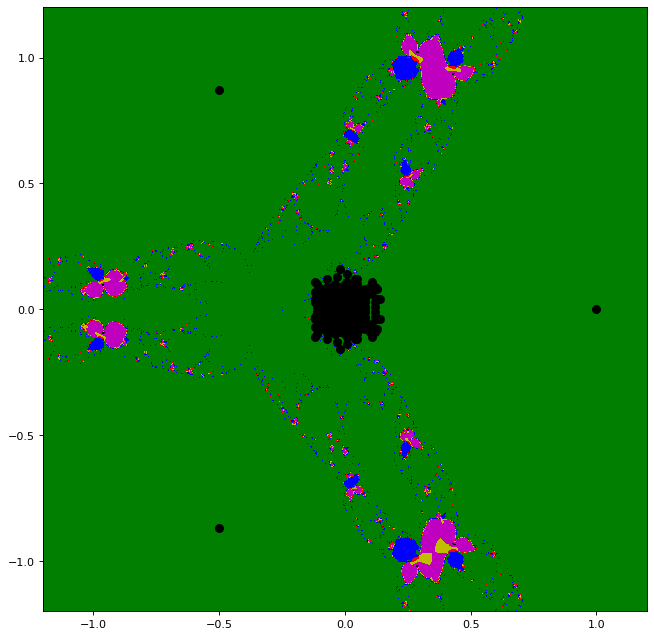

In [37]:
#Plot figure

plt.figure(figsize=(10,10), dpi = 80)
plt.imshow(zcol, cmap=cmap, extent=[-a, a, -a, a])
for x,y in root_list:
    #print("Roots:", x,y)
    plt.scatter(x, y, s=50, c='black', marker='o')

Pode-se ver neste primer tento que o cálculo não é muito exato, temos que o método dá as três raizes do problema, porém o método está dando mais raizes, por que está acontecendo isso? Bom, a primeira coisa que devemos pensar é no jeito do método da secante, pois ele precisa de dois chutes iniciais então se essos chutes não são bom escolhidos então pode-se apresentar problemas na convergência, assim temos que a precição do método depende dos valores iniciais. Outro fator é o dominio em onde a função é avaliada, porque se você tenta com $a=2$, o comportamiento do método varia como pode-se ver no seguinte.

In [38]:
#Dominio [-a,a]x[-a*i,a*i]
a = 2

#Discretização do dominio em 2000 pontos
d = 1001j

#Malha de reais em R2
x, y = np.ogrid[-a:a:d, -a:a:d]

#Malha de complexos

z0 = x + 1j*y
z1 = z0 + (0.37+0j)

In [39]:
zroot1 = secan(t, x0=z0, x1=z1)
print(zroot1)

[[nan+nanj nan+nanj nan+nanj ... nan+nanj nan+nanj nan+nanj]
 [nan+nanj nan+nanj nan+nanj ... nan+nanj nan+nanj nan+nanj]
 [nan+nanj nan+nanj nan+nanj ... nan+nanj nan+nanj nan+nanj]
 ...
 [nan+nanj nan+nanj nan+nanj ... nan+nanj nan+nanj nan+nanj]
 [nan+nanj nan+nanj nan+nanj ... nan+nanj nan+nanj nan+nanj]
 [nan+nanj nan+nanj nan+nanj ... nan+nanj nan+nanj nan+nanj]]


In [40]:
#Saiu do domnínio?
eps = 1e-16
zroot1[ np.isnan(zroot1) ] = 0.0 + 0j
zroot1[ np.abs(zroot1.real) > a-eps] = 0.0 + 0j
zroot1[ np.abs(zroot1.imag) > a-eps] = 0.0 + 0j
#zroot[ np.abs(zroot.real) < 0.4] = 0.0 + 0j
#print(np.angle(z))

#Raízes que achei
unique_roots1 = np.unique(zroot1.round(decimals=2))
unique_roots1 = np.delete(unique_roots1,(unique_roots1==0j).argmax())
root_list1 = []
print("Raízes que achei (aproximadas):")
for root in unique_roots1:
    root_list1.append((root.real, root.imag))
    print(root)

nroots1 = len(unique_roots1)
print(nroots1)

Raízes que achei (aproximadas):
(-0.5-0.87j)
(-0.5+0.87j)
(-0.11-0.04j)
(-0.11-0.02j)
(-0.11-0.01j)
(-0.11-0j)
(-0.11+0.01j)
(-0.11+0.02j)
(-0.11+0.04j)
(-0.1-0.2j)
(-0.1-0.04j)
(-0.1-0.03j)
(-0.1-0.02j)
(-0.1-0.01j)
(-0.1+0.01j)
(-0.1+0.02j)
(-0.1+0.03j)
(-0.1+0.04j)
(-0.1+0.2j)
(-0.09-0.03j)
(-0.09-0.01j)
(-0.09-0j)
(-0.09+0.01j)
(-0.09+0.03j)
(-0.08-0.13j)
(-0.08-0.09j)
(-0.08-0.08j)
(-0.08-0.04j)
(-0.08-0.03j)
(-0.08-0.02j)
(-0.08-0.01j)
(-0.08-0j)
(-0.08+0.01j)
(-0.08+0.02j)
(-0.08+0.03j)
(-0.08+0.04j)
(-0.08+0.08j)
(-0.08+0.09j)
(-0.08+0.13j)
(-0.07-0.07j)
(-0.07-0.05j)
(-0.07-0.04j)
(-0.07-0.03j)
(-0.07-0.02j)
(-0.07-0.01j)
(-0.07-0j)
(-0.07+0.01j)
(-0.07+0.02j)
(-0.07+0.03j)
(-0.07+0.04j)
(-0.07+0.05j)
(-0.07+0.07j)
(-0.06-0.15j)
(-0.06-0.11j)
(-0.06-0.07j)
(-0.06-0.06j)
(-0.06-0.05j)
(-0.06-0.04j)
(-0.06-0.03j)
(-0.06-0.02j)
(-0.06-0.01j)
(-0.06-0j)
(-0.06+0.01j)
(-0.06+0.02j)
(-0.06+0.03j)
(-0.06+0.04j)
(-0.06+0.05j)
(-0.06+0.06j)
(-0.06+0.07j)
(-0.06+0.11j)
(-0.06+0.15j)
(-0

In [41]:
#Transformar os valores das raízes imaginárias em cores! 
zcol= np.zeros_like(zroot1, dtype=np.int64)
tol=0.01
for i, root in enumerate(unique_roots1):
    zcol[np.abs(zroot1-root)<tol] = i

#Inverte eixos para plots
zcol = zcol.swapaxes(0,1)

# inverte ordem do eixo y (plotar de baixo para cima)
#zcol = zcol[:, ::-1]


# Cores das raízes
colors = [ 'g', 'b', 'r','y', 'm', 'k',]
cmap = ListedColormap(colors[:nroots])

print(zcol)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


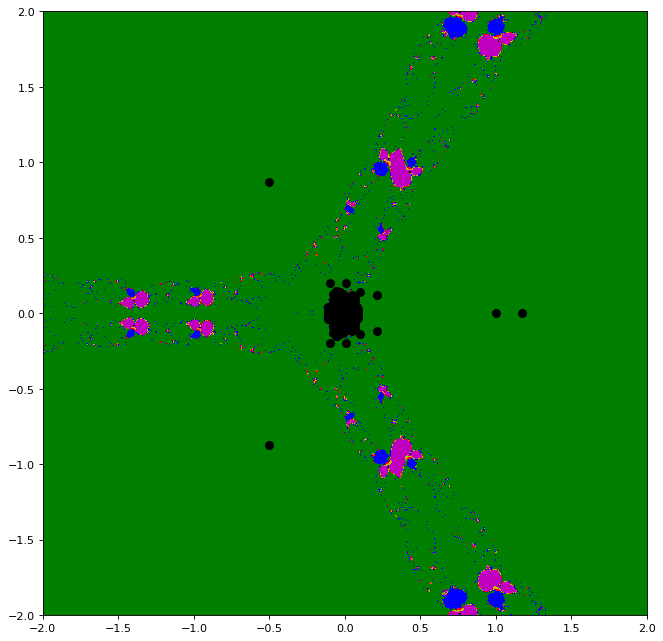

In [42]:
#Plot figure

plt.figure(figsize=(10,10), dpi = 80)
plt.imshow(zcol, cmap=cmap, extent=[-a, a, -a, a])
for x,y in root_list1:
    #print("Roots:", x,y)
    plt.scatter(x, y, s=50, c='black', marker='o')

O que muda é que neste segundo caso ter menos valores no vetor solução que se tomamos o dominio com $a=1$. Essas raizes de mais também poden ser justificadas pelo feito de que não parou pelo método senão que parou pela cantidade de iterações do programa portanto poderiamos dizer que essas não são raizes. Agora tentemos melhorar isso adicionando algumos criterios de parada, esses criterios de parada são os seguintes:
1. se $ |f(x_{n+1})|<\epsilon_1$ então para.
2. se $|x_{n+1}-x_n|<\epsilon_2$ então para.
Essas duas condições devem ser aplicadas a fim de tê-las em cada uma das entradas da malha.

In [43]:
#Dominio [-a,a]x[-a*i,a*i]
a = 2

#Discretização do dominio em 2000 pontos
d = 1001j

#Malha de reais em R2
x, y = np.ogrid[-a:a:d, -a:a:d]

#Malha de complexos

z0 = x + 1j*y
z1 = z0 + (0.37+0j)

In [44]:
#adicionando criterios de parada.
def secan1(f, x0, x1, eps = 1e-16, niter = 200):
    np.seterr(divide='ignore', invalid='ignore')
    c = np.zeros_like(x0)              #criamos a matriz c de zeros do mesmo tamanho que a malha
    c[c==0]=np.nan                     #trocamos todas as entradas de c por nan
    for i in range(1,niter):
        res = f(x1)-f(x0)
        dif = x1-x0
        fb = f(x1)
        res[np.abs(res) < eps] = np.nan
        z = x1 - f(x1)*dif/res
        x0 = x1
        x1 = z                         #até aqui, é o mesmo que temos acima.
        b = np.zeros_like(fb)          #criamos a matriz b de zeros do mesmo tamanho que a malha
        b[b==0] = np.nan               #trocamos todas as entradas de b por nan 
        #adicionamos os criterios de parada
        b[(np.abs(fb)<eps) | (np.abs(dif)<eps)]=z[(np.abs(fb)<eps) | (np.abs(dif)<eps)] 
        mask = np.isnan(c)             #perguntamos quales são as entradas que ainda são nan
        #se a entrada satisfaz a condição anhiade o valor na entrada e deixa quetos os valores que a condição já foi cumprida.
        c[mask] = b[mask]   
        #print(c)
        #a operação dessa parte pode verla ao final deste notebook.
    return c

zroot2 = secan1(t, x0=z0, x1=z1)


In [45]:
zroot2

array([[nan+0.00000000e+00j, nan+0.00000000e+00j, nan+0.00000000e+00j,
        ..., nan+0.00000000e+00j, nan+0.00000000e+00j,
        nan+0.00000000e+00j],
       [nan+0.00000000e+00j, nan+0.00000000e+00j, nan+0.00000000e+00j,
        ..., nan+0.00000000e+00j, nan+0.00000000e+00j,
        nan+0.00000000e+00j],
       [nan+0.00000000e+00j, nan+0.00000000e+00j, nan+0.00000000e+00j,
        ..., nan+0.00000000e+00j, nan+0.00000000e+00j,
        nan+0.00000000e+00j],
       ...,
       [ 1.+6.58276836e-37j,  1.+2.63310735e-36j,  1.+3.43244350e-36j,
        ...,  1.-3.43244350e-36j,  1.-2.63310735e-36j,
         1.-6.58276836e-37j],
       [ 1.+3.29138418e-37j,  1.+0.00000000e+00j,  1.+1.64569209e-37j,
        ...,  1.-1.64569209e-37j,  1.+0.00000000e+00j,
         1.-3.29138418e-37j],
       [ 1.-1.83377119e-36j,  1.+5.52482345e-37j,  1.+1.05794492e-37j,
        ...,  1.-1.05794492e-37j,  1.-5.52482345e-37j,
         1.+1.83377119e-36j]])

In [46]:
z1

array([[-1.63 -2.j   , -1.63 -1.996j, -1.63 -1.992j, ..., -1.63 +1.992j,
        -1.63 +1.996j, -1.63 +2.j   ],
       [-1.626-2.j   , -1.626-1.996j, -1.626-1.992j, ..., -1.626+1.992j,
        -1.626+1.996j, -1.626+2.j   ],
       [-1.622-2.j   , -1.622-1.996j, -1.622-1.992j, ..., -1.622+1.992j,
        -1.622+1.996j, -1.622+2.j   ],
       ...,
       [ 2.362-2.j   ,  2.362-1.996j,  2.362-1.992j, ...,  2.362+1.992j,
         2.362+1.996j,  2.362+2.j   ],
       [ 2.366-2.j   ,  2.366-1.996j,  2.366-1.992j, ...,  2.366+1.992j,
         2.366+1.996j,  2.366+2.j   ],
       [ 2.37 -2.j   ,  2.37 -1.996j,  2.37 -1.992j, ...,  2.37 +1.992j,
         2.37 +1.996j,  2.37 +2.j   ]])

In [47]:
#Saiu do domnínio?
eps = 1e-16
zroot2[ np.isnan(zroot2) ] = 0.0 + 0j
zroot2[ np.abs(zroot2.real) > a-eps] = 0.0 + 0j
zroot2[ np.abs(zroot2.imag) > a-eps] = 0.0 + 0j
#zroot[ np.abs(zroot.real) < 0.4] = 0.0 + 0j
#print(np.angle(z))

#Raízes que achei
unique_roots2 = np.unique(zroot2.round(decimals=2))
unique_roots2 = np.delete(unique_roots2,(unique_roots2==0j).argmax())
root_list2 = []
print("Raízes que achei (aproximadas):")
for root in unique_roots2:
    root_list2.append((root.real, root.imag))
    print(root)

nroots2 = len(unique_roots2)
print(nroots2)

Raízes que achei (aproximadas):
(-0.5-0.87j)
(-0.5+0.87j)
(1-0j)
3


In [48]:
#Transformar os valores das raízes imaginárias em cores! 
zcol= np.zeros_like(zroot2, dtype=np.int64)
tol=0.01
for i, root in enumerate(unique_roots2):
    zcol[np.abs(zroot2-root)<tol] = i

#Inverte eixos para plots
zcol = zcol.swapaxes(0,1)

# inverte ordem do eixo y (plotar de baixo para cima)
#zcol = zcol[:, ::-1]


# Cores das raízes
colors = [ 'g', 'b', 'r','y', 'm', 'k',]
cmap = ListedColormap(colors[:nroots2])

print(zcol)

[[0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 ...
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]]


Roots: -0.5 -0.87
Roots: -0.5 0.87
Roots: 1.0 -0.0


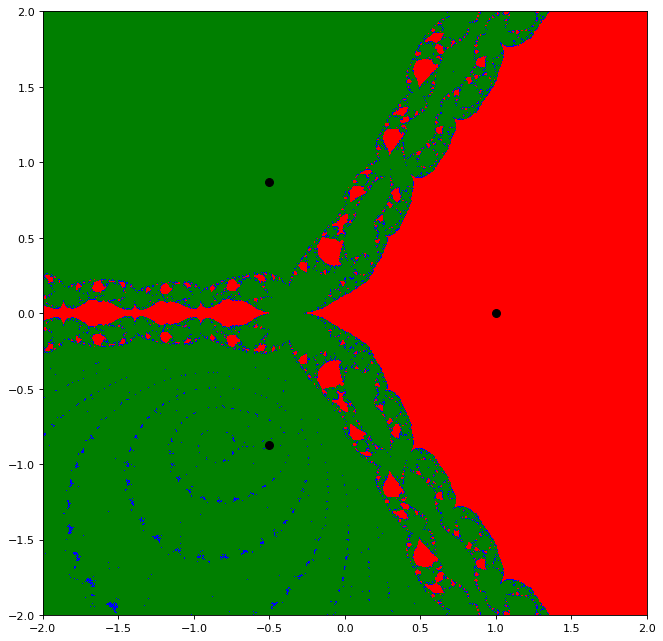

In [49]:
#Plot figure

plt.figure(figsize=(10,10), dpi = 80)
plt.imshow(zcol, cmap=cmap, extent=[-a, a, -a, a])
for x,y in root_list2:
    print("Roots:", x,y)
    plt.scatter(x, y, s=50, c='black', marker='o')

Podemos ver que adicionando os criterios de parada o método apresenta muita melhoria, o primero é que, só temos as três raizes que estamos procurando, a diferença da parte de acima que tínhamos muitos mais valores. Por outro lado, apesar de que o fractai não é tão bonitinho como no método de Newton, temos uma melhor semelhança com o método de Newton. Outro ponto, é que según o gráfico a raiz que tem mais pontos para converjir é $z=-0.5+0.87i$ (verde) e a que tem menos é $z=-0.5-0.87i$ (azul). 


## Operação da parte dos criterios de parada.
Nesta parte pode-se ver como é a operação para obter os criterios de parada para o método das secantes.

In [54]:
a = np.random.rand(3, 3) + 1j * np.random.rand(3, 3)
c = np.zeros_like(a)
c[c==0]=np.nan
print(c)

[[nan+0.j nan+0.j nan+0.j]
 [nan+0.j nan+0.j nan+0.j]
 [nan+0.j nan+0.j nan+0.j]]


In [55]:
print(a)

[[0.86354956+0.32912533j 0.72648522+0.14606979j 0.48406097+0.0608075j ]
 [0.66558062+0.18122848j 0.60792618+0.59686157j 0.77632303+0.88545287j]
 [0.06992509+0.30888764j 0.15210909+0.44538559j 0.90230716+0.09624112j]]


In [63]:
b = np.zeros_like(a)
b[b==0] = np.nan
b[np.abs(a.real>0.8)]=a[np.abs(a.real>0.8)]
mask = np.isnan(c)
c[mask] = b[mask]
print(c)

[[0.86354956+0.32912533j        nan+0.j                nan+0.j        ]
 [       nan+0.j                nan+0.j                nan+0.j        ]
 [       nan+0.j                nan+0.j         0.90230716+0.09624112j]]


In [64]:
b[np.abs(a.real<0.1)] = a[np.abs(a.real<0.1)]
mask = np.isnan(c)
c[mask]=b[mask]
print(c)

[[0.86354956+0.32912533j        nan+0.j                nan+0.j        ]
 [       nan+0.j                nan+0.j                nan+0.j        ]
 [0.06992509+0.30888764j        nan+0.j         0.90230716+0.09624112j]]


In [65]:
print(mask)

[[False  True  True]
 [ True  True  True]
 [ True  True False]]


In [66]:
c[mask]

array([       nan+0.j        ,        nan+0.j        ,
              nan+0.j        ,        nan+0.j        ,
              nan+0.j        , 0.06992509+0.30888764j,
              nan+0.j        ])